# Lecture 17: Gradient Descent


## Minimizing an Arbitrary 1D Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Configure nice plotting defaults 
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

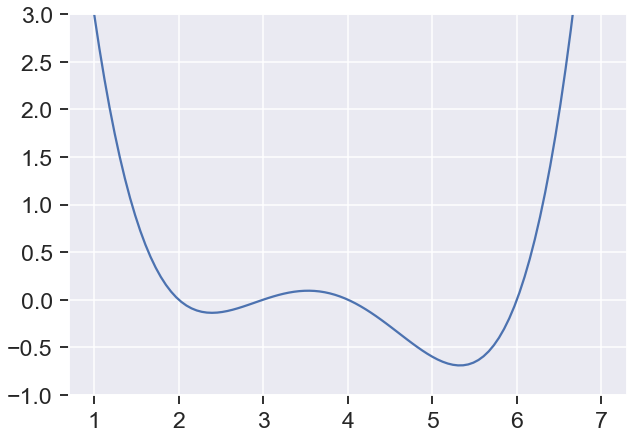

In [3]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

x = np.linspace(1, 7, 100)
plt.plot(x, arbitrary(x))
axes = plt.gca()
axes.set_ylim([-1, 3]);
# plt.savefig("fx4.png", dpi = 300, bbox_inches = "tight")

Visually, we can see above that the minimum is somewhere around 5.3ish. Let's see if we can figure out how to find the exact minimum algorithmically.

One way very slow and terrible way would be manual guess-and-check.

In [4]:
arbitrary(5.4)

-0.6854400000000282

A somewhat better approach is to use brute force to try out a bunch of x values and return the one that yields the lowest loss.

In [5]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

In [6]:
simple_minimize(arbitrary, np.linspace(1, 7, 20))

5.421052631578947

This process is essentially the same as before where we made a graphical plot, it's just that we're only looking at 20 selected points.

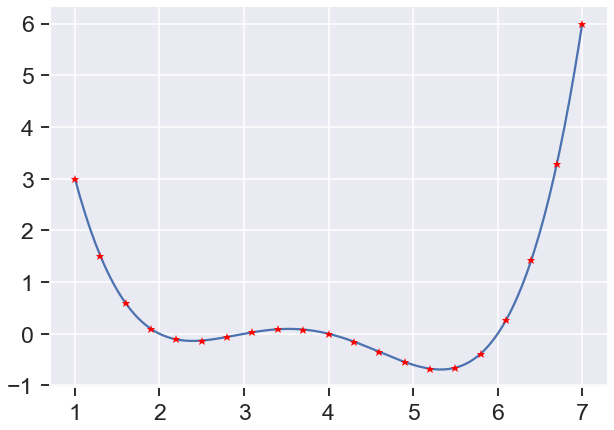

In [7]:
xs = np.linspace(1, 7, 200)
sparse_xs = np.linspace(1, 7, 21)

ys = arbitrary(xs)
sparse_ys = arbitrary(sparse_xs)

plt.plot(xs, ys, label = "f")
plt.plot(sparse_xs, sparse_ys, 'r*', label = "f");
# plt.savefig("f_brute_force.png", dpi=300, bbox_inches = "tight")

This basic approach is incredibly inefficient, and suffers from two major flaws:
1. If the minimum is outside our range of guesses, the answer will be completely wrong.
2. Even if our range of guesses is correct, if the guesses are too coarse, our answer will be inaccurate.

### Better Approach: Gradient Descent

Instead of choosing all of our guesses ahead of time, we can instead start from a single guess and try to iteratively improve on our choice. 

They key insight is this: If the derivative of the function is negative, that means the function is decreasing, so we should go to the right (i.e. pick a bigger x). If the derivative of the function is positive, that means the function is increasing, so we should go to the left (i.e. pick a smaller x).

Thus, the derivative tells us which way to go.

In [8]:
#desmos demo: https://www.desmos.com/calculator/twpnylu4lr

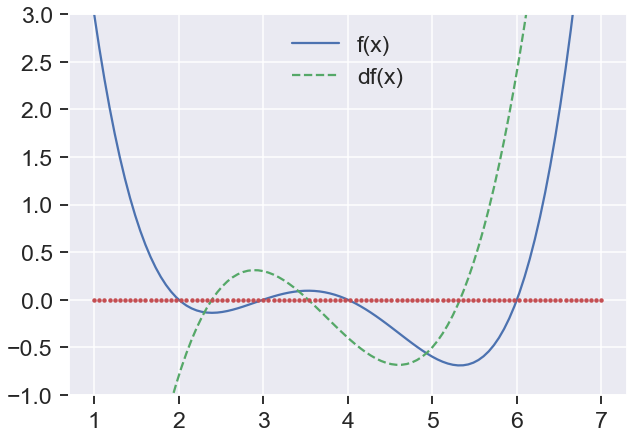

In [9]:
def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10

def line(x):
    return (0*x)
plt.plot(x, arbitrary(x))
plt.plot(x, derivative_arbitrary(x), '--')
plt.plot(x, line(x), '.')

plt.legend(['f(x)', 'df(x)'])
axes = plt.gca()
axes.set_ylim([-1, 3]);

In [10]:
def plot_arbitrary():
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 3])
    
def plot_x_on_f(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)
    
def plot_x_on_f_empty(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c = 'none', edgecolor=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)    
    
def plot_tangent_on_f(f, x, eps=1e-6):
    slope = ((f(x + eps) - f(x - eps))
             / (2 * eps))
    xs = np.arange(x - 1, x + 1, 0.05)
    ys = f(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')    

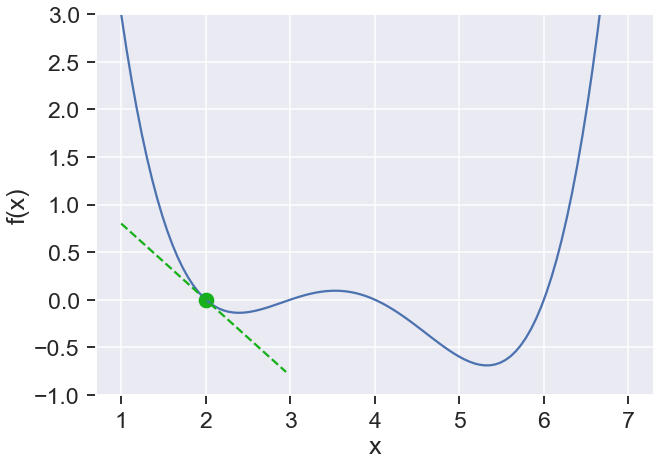

In [11]:
plot_arbitrary()
plot_x_on_f(arbitrary, 2)
plot_tangent_on_f(arbitrary, 2)
plt.xlabel('x')
plt.ylabel('f(x)');
#plt.savefig('dfx_1.png')

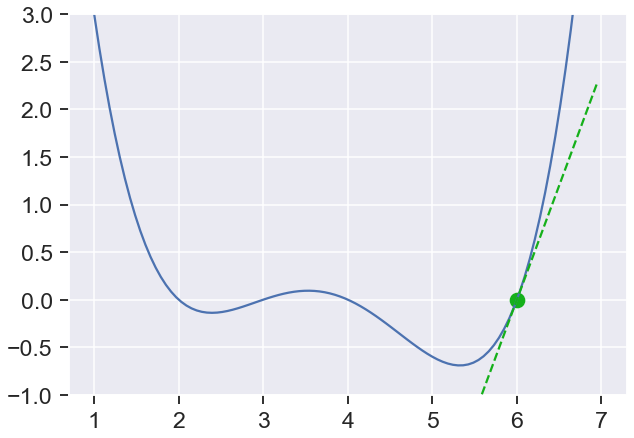

In [12]:
plot_arbitrary()
plot_x_on_f(arbitrary, 6)
plot_tangent_on_f(arbitrary, 6)
#plt.savefig('dfx_2.png')

Armed with this knowledge, let's try to see if we can use the derivative to optimize the function.

In [13]:
derivative_arbitrary(4)

-0.4

In [14]:
derivative_arbitrary(4 + 0.4)

-0.6464000000000055

In [15]:
derivative_arbitrary(4 + 0.4 + 0.64)

-0.45757440000001

In [16]:
derivative_arbitrary(4 + 0.4 + 0.64 + 0.457)

0.4166188892000037

In [17]:
derivative_arbitrary(4)

-0.4

In [18]:
derivative_arbitrary(4 + 0.4)

-0.6464000000000055

In [19]:
derivative_arbitrary(4 + 0.4 + 0.64)

-0.45757440000001

In [20]:
derivative_arbitrary(4 + 0.4 + 0.64 + 0.46)

0.425

In [21]:
def plot_one_step(x):
    new_x = x - derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 5.48
new x: 5.1101631999999935


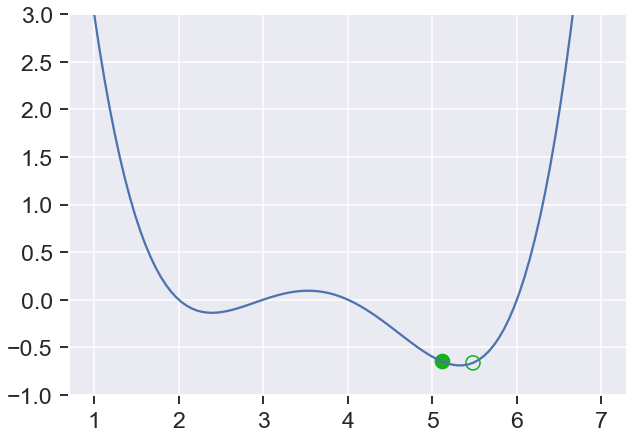

In [22]:
plot_one_step( 5.48)

In [23]:
def plot_one_step_better(x):
    new_x = x - 0.3 * derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 5.32
new x: 5.32398784


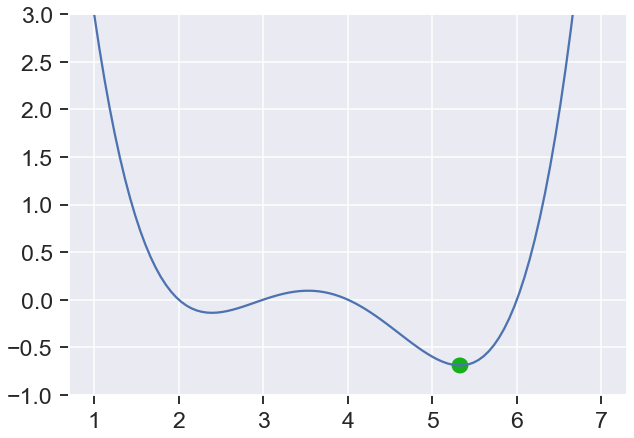

In [24]:
plot_one_step_better(5.32)

Written as a recurrence relation, the process we've described above is:

$$
x^{(t+1)} = x^{(t)} -  0.3 \frac{d}{dx} f(x)
$$

This algorithm is also known as "gradient descent". 

Given a current $\gamma$, gradient descent creates its next guess for $\gamma$ based on the sign and magnitude of the derivative.

Our choice of 0.3 above was totally arbitrary. Naturally, we can generalize by replacing it with a parameter, typically represented by $\alpha$, and often called the "learning rate".

$$
x^{(t+1)} = x^{(t)} -  \alpha \frac{d}{dx} f(x)
$$

We can also write up this procedure in code as given below:

In [25]:
def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

In [26]:
trajectory = gradient_descent(derivative_arbitrary, 4, 1.5, 20)
trajectory

array([4.        , 4.6       , 5.6284    , 4.39841721, 5.36714058,
       5.23345463, 5.50301118, 4.85283564, 5.77676546, 3.72284331,
       3.96846217, 4.53018801, 5.55049763, 4.6927978 , 5.70865641,
       4.05220573, 4.7135408 , 5.72270104, 3.98700301, 4.57133193])

Below, we see a visualization of the trajectory taken by this algorithm.

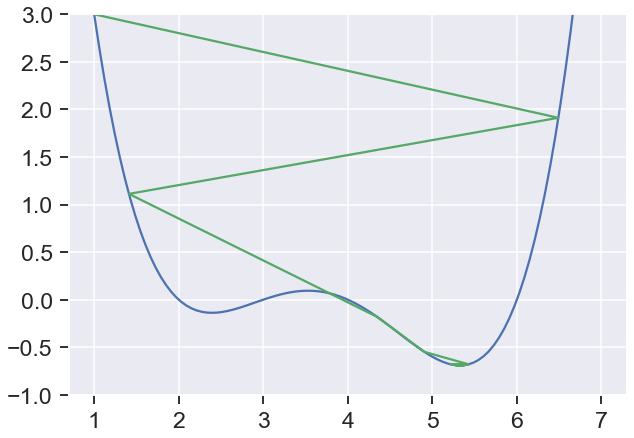

In [27]:
trajectory = gradient_descent(derivative_arbitrary, 1, 0.9, 20)
plot_arbitrary()
plt.plot(trajectory, arbitrary(trajectory));

Above, we've simply run our algorithm a fixed number of times. More sophisticated implementations will stop based on a variety of different stopping criteria, e.g. error getting too small, error getting too large, etc. We will not discuss these in our course.

In the next part, we'll return to the world of data science and see how this procedure might be useful for optimizing models.

In [28]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

We'll continue where we left off earlier. We'll see 5 different ways of computing parameters for a 1D, then 2D linear model. These five techniques will be:
1. Brute Force
2. Closed Form Solutions
3. Gradient Descent
4. scipy.optimize.minimize
5. sklean.linear_model.LinearRegression

## Linear Regression With No Offset

Let's consider a case where we have a linear model with no offset. That is, we want to find the parameter $\gamma$ such that the L2 loss is minimized.

In [30]:
tips = sns.load_dataset("tips")

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


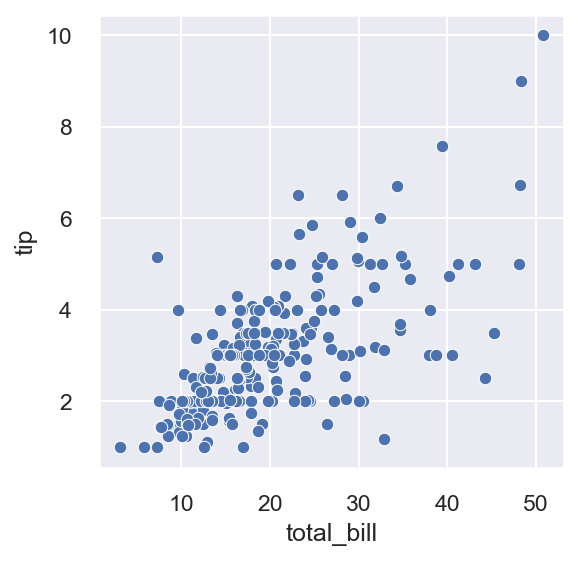

In [31]:
sns.scatterplot(tips["total_bill"], tips["tip"]);

We'll use a one parameter model that the output is $\hat{\gamma}$ times the x value. For example if $\hat{\gamma} = 0.1$, then $\hat{y} = \hat{\gamma} x$, and we are making the prediction line below.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


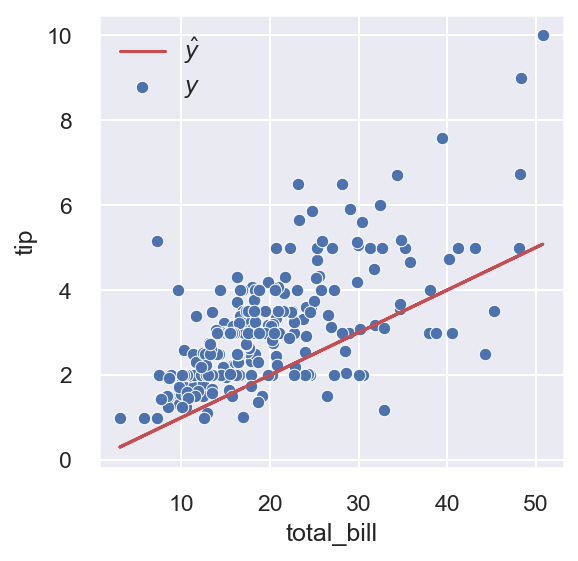

In [32]:
sns.scatterplot(tips["total_bill"], tips["tip"])
x = tips["total_bill"]
y_hat = 0.1 * x
plt.plot(x, y_hat, 'r')
plt.legend(['$\hat{y}$', '$y$']);
#plt.savefig("tip_vs_total_bill.png", dpi=300)

Suppose we select the L2 loss as our loss function. In this case, our goal will be to minimize the mean squared error. 

Let's start by writing a function that computes the MSE for a given choice of $\gamma$ on our dataset.

In [33]:
def mse_loss(gamma, x, y_obs):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)    

In [34]:
x = tips["total_bill"]
y_obs = tips["tip"]
mse_loss(0.1, x, y_obs)

2.077768372950818

Our goal is to find the $\hat{\gamma}$ with minimum MSE.

### Approach 1: Closed Form Solutions

On HW5 problem 3, you derived using calculus that the optimal answer is:

$$\hat{\gamma} = \frac{\sum(x_i y_i)}{\sum(x_i^2)}$$

We can calculate this value below.

In [35]:
np.sum(tips["tip"] * tips["total_bill"])/np.sum(tips["total_bill"]**2)

0.14373189527721666

Alternately, we can use the generic equation for linear regression that we derived in lecture using the definition of orthogonality.

In [36]:
X = tips[["total_bill"]]
y = tips["tip"]
np.linalg.inv(X.T @ X) @ X.T @ y

0    0.143732
dtype: float64

### Optimization Approach #2A: Plotting the MSE vs. $\hat{\gamma}$

Since `x` and `y_obs` are fixed, the only variable is `gamma`. 

For clarity, let's define a python function that returns the MSE as a function of a single argument `gamma`.

In [37]:
def mse_single_arg(gamma):
    """Returns the MSE on our data for the given gamma"""
    x = tips["total_bill"]
    y_obs = tips["tip"]
    y_hat = gamma * x
    return mse_loss(gamma, x, y_obs)

In [38]:
mse_single_arg(0.1)

2.077768372950818

Thus we can plot the MSE as a function of `gamma`. It turns out to look pretty smooth, and quite similar to a parabola.

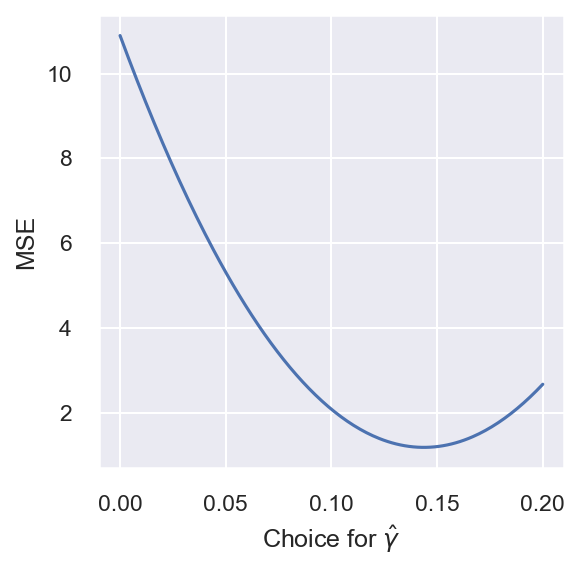

In [39]:
gammas = np.linspace(0, 0.2, 200)
x = tips["total_bill"]
y_obs = tips["tip"]

MSEs = [mse_single_arg(gamma) for gamma in gammas]

plt.plot(gammas, MSEs)
plt.xlabel(r"Choice for $\hat{\gamma}$")
plt.ylabel(r"MSE");
#plt.savefig("tips_MSE_vs_gamma.png", dpi=300, bbox_inches = "tight")

The minimum appears to be around $\hat{\gamma} = 0.14$.

### Approach 2B: Brute Force 

Recall our simple_minimize function from earlier, redefined below for your convenience.

In [40]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

In [41]:
simple_minimize(mse_single_arg, np.linspace(0, 0.2, 21))

0.14

As before, what we're doing is computing all the starred values below and then returning the $\hat{\theta}$ that goes with the minimum value.

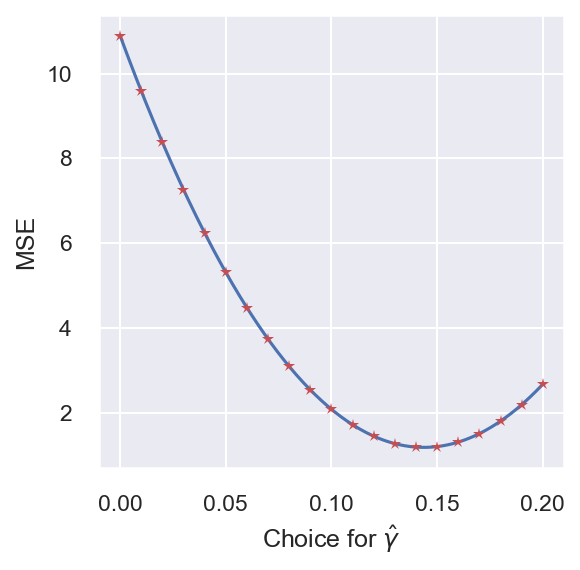

In [42]:
gammas = np.linspace(0, 0.2, 200)
sparse_gammas = np.linspace(0, 0.2, 21)

loss = [mse_single_arg(gamma) for gamma in gammas]
sparse_loss = [mse_single_arg(gamma) for gamma in sparse_gammas]

plt.plot(gammas, loss)
plt.plot(sparse_gammas, sparse_loss, 'r*')
plt.xlabel(r"Choice for $\hat{\gamma}$")
plt.ylabel(r"MSE");
#plt.savefig("tips_brute_force.png", dpi=300, bbox_inches = "tight")

### Approach 3: Use Gradient Descent

Another approach is to use our 1D gradient descent algorithm from earlier.

In [43]:
def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

To use this function, we need to compute the derivative of the MSE. The MSE is repeated below for convenience.

In [44]:
def mse_loss(gamma, x, y_obs):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)    

In [45]:
def mse_loss_derivative(gamma, x, y_obs):
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [ ]:
#def squared_loss_derivative(y_hat, y_obs, x):
#    """Returns the derivative of the squared loss for a single prediction"""
#    return 2*(y_hat - y_obs)*x
#    
#def mse_derivative(y_hat, y_obs, x):
#    """Returns the derivative of the MSE"""
#    return np.mean(squared_loss_derivative(y_hat, y_obs, x))

We can try out different values of `gamma` and see what we get back as our derivative.

In [46]:
gamma = 0.1
x = tips["total_bill"]
y_obs = tips["tip"]

mse_loss_derivative(gamma, x, y_obs)

-41.14398663934429

Just like our `mse_of_gamma`, we can write a function that returns the derivative of the MSE as a function of a single argument `gamma`.

In [47]:
def mse_loss_derivative_single_arg(gamma):
    x = tips["total_bill"]
    y_obs = tips["tip"]    

    return mse_loss_derivative(gamma, x, y_obs)

In [48]:
mse_loss_derivative_single_arg(0.1)

-41.14398663934429

In [49]:
gradient_descent(mse_loss_derivative_single_arg, 0.05, 0.0001, 100)

array([0.05      , 0.05881852, 0.06680736, 0.0740446 , 0.08060095,
       0.08654045, 0.09192116, 0.09679563, 0.10121151, 0.10521192,
       0.10883597, 0.11211906, 0.11509327, 0.11778766, 0.12022855,
       0.1224398 , 0.12444301, 0.12625776, 0.12790176, 0.1293911 ,
       0.13074031, 0.13196259, 0.13306988, 0.13407298, 0.13498172,
       0.13580495, 0.13655074, 0.13722636, 0.13783841, 0.13839289,
       0.13889519, 0.13935024, 0.13976248, 0.14013593, 0.14047425,
       0.14078073, 0.14105839, 0.14130992, 0.14153778, 0.14174421,
       0.14193122, 0.14210063, 0.1422541 , 0.14239314, 0.14251909,
       0.14263319, 0.14273656, 0.1428302 , 0.14291504, 0.14299189,
       0.14306151, 0.14312458, 0.14318172, 0.14323348, 0.14328037,
       0.14332285, 0.14336134, 0.1433962 , 0.14342778, 0.14345639,
       0.14348231, 0.1435058 , 0.14352707, 0.14354634, 0.1435638 ,
       0.14357961, 0.14359394, 0.14360692, 0.14361868, 0.14362933,
       0.14363898, 0.14364772, 0.14365564, 0.14366281, 0.14366

In the context of minimizing loss, we can write out the gradient descent rule for generating the next $\gamma$ as:

$$
\gamma^{(t+1)} = \gamma^{(t)} - \alpha \frac{\partial}{\partial \gamma} L(\gamma^{(t)}, \Bbb{X}, \vec{\hat{y}})
$$

Here $L$ is our chosen loss function, $\Bbb{X}$ is our design matrix, and $\vec{\hat{y}}$ are our observations. During the gradient descent algorithm, we treat $\Bbb{X}$ and $\vec{\hat{y}}$ as constants.

### Approach 4: scipy.optimize.minimize

We can also use `scipy.optimize.minimize`.

In [50]:
import scipy.optimize
from scipy.optimize import minimize
minimize(mse_single_arg, x0 = 0)

      fun: 1.1781161154513213
 hess_inv: array([[1]])
      jac: array([4.24683094e-06])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.14373189])

A natural question that arises: How does `scipy.optimize.minimize` work? We won't discuss the exact algorithm used by the code (see [this wikipedia page about the BFGS algorithm if you're curious, though](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)).

Gradient descent is related to BFGS, though generally doesn't work as well. Comparison of numerical optimization algorithms is very far beyond the scope of our course.

### Approach 5: sklearn.linear_model.LinearRegression

We can also go one level of abstraction higher and simply fit a linear model using sklearn.

In [51]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False)

In [52]:
X = tips[["total_bill"]]
y = tips["tip"]
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [53]:
model.coef_

array([0.1437319])

## Multi Dimensional Models

In [54]:
#tips datset
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Now suppose we improve our model so that we want to predict the tip from the total_bill plus a constant offset, in other words:

$$\textrm{tip} = \hat{\theta}_0 + \hat{\theta}_1 \textrm{bill}$$

To keep things in the simple framework from lecture, we can create a design matrix with the bias vector in one column and the total_bill in the other.

In [55]:
tips_with_bias = tips.copy()
tips_with_bias["bias"] = 1
X = tips_with_bias[["total_bill", "bias"]]
X.head(5)

,total_bill,bias
0,16.99,1
1,10.34,1
2,21.01,1
3,23.68,1
4,24.59,1


Now, we can give our predictions as $$\vec{\hat{y}} = f_{\vec{\hat{\theta}}}(\Bbb{X}) = \Bbb{X} \vec{\hat{\theta}}$$

For example, the predictions below correspond to assuming every table leaves a tip of \$1.50 plus 5% of their total bill.

In [56]:
X @ np.array([0.05, 1.50]) 

0      2.3495
1      2.0170
2      2.5505
3      2.6840
4      2.7295
        ...  
239    2.9515
240    2.8590
241    2.6335
242    2.3910
243    2.4390
Length: 244, dtype: float64

Throughout this problem, we'll assume we want to minimize the mean squared error of our predictions, i.e.

In [57]:
def mse_loss(theta, X, y_obs):
    y_hat = X @ theta
    return np.mean((y_hat - y_obs) ** 2)    

For example, the loss assuming the model described above is:

In [58]:
mse_loss(np.array([0.05, 1.50]), X, y_obs)

1.534052175204919

### Approach 1: Closed Form Solution

In [59]:
y_obs

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [60]:
X = tips_with_bias[["total_bill", "bias"]]
X.head(5)

,total_bill,bias
0,16.99,1
1,10.34,1
2,21.01,1
3,23.68,1
4,24.59,1


In [61]:
y_obs = tips["tip"]
y_obs.head(5)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [62]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y_obs
theta_hat

0    0.105025
1    0.920270
dtype: float64

In [63]:
#Note: It's generally a better idea to use np.linalg.solve.
#np.linalg.inv is slow and can sometimes return incorrect results due to rounding issues.
#np.linalg.solve is faster and generally better behaved.
theta_hat = np.linalg.solve(X.T @ X, X.T @ y_obs)

In [64]:
theta_hat

array([0.10502452, 0.92026961])

### Approach 2: Brute Force

As before, we can simply try out a bunch of theta values and see which works best. In this case, since we have a 2D theta, there's a much bigger space of possible values to try.

In [65]:
def mse_loss(theta, X, y_obs):
    y_hat = X @ theta
    return np.mean((y_hat - y_obs) ** 2)    

As before, it's convenient to first create an mse function of a single argument.

In [66]:
X = tips_with_bias[["total_bill", "bias"]]
y_obs = tips["tip"]

def mse_loss_single_arg(theta):  
    return mse_loss(theta, X, y_obs)

In [67]:
mse_loss_single_arg([0.01, 0.02])

9.479444821434424

Using this function, we can create a 3D plot. This uses lots of syntax you've never seen.

In [68]:
import plotly.graph_objects as go

uvalues = np.linspace(0, 0.2, 10)#)1)
vvalues = np.linspace(0, 2, 10)#)1)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))

MSE = np.array([mse_loss_single_arg(t) for t in thetas.T])

loss_surface = go.Surface(x=u, y=v, z=np.reshape(MSE, u.shape))

ind = np.argmin(MSE)
optimal_point = go.Scatter3d(name = "Optimal Point",
    x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
    z = [MSE[ind]],
    marker=dict(size=10, color="red"))

fig = go.Figure(data=[loss_surface, optimal_point])
fig.update_layout(scene = dict(
    xaxis_title = "theta0",
    yaxis_title = "theta1",
    zaxis_title = "MSE"))
fig.show()

### Approach 3: Gradient Descent

Gradient descent is exactly like it was before, only now our gradient is somewhat more complicated.

In [69]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""    
    x0 = X.iloc[:, 0]
    x1 = X.iloc[:, 1]
    dth0 = np.mean(-2 * (y_obs - theta[0] * x0 - theta[1] * x1) * x0)
    dth1 = np.mean(-2 * (y_obs - theta[0] * x0 - theta[1] * x1) * x1)
    return np.array([dth0, dth1])

In [70]:
X = tips_with_bias[["total_bill", "bias"]]
y_obs = tips["tip"]
mse_gradient(np.array([0, 0]), X, y_obs)

array([-135.22631803,   -5.99655738])

In [71]:
def mse_gradient_single_arg(theta):
    """Returns the gradient of the MSE on our data for the given theta"""
    X = tips_with_bias[["total_bill", "bias"]]
    y_obs = tips["tip"]
    return mse_gradient(theta, X, y_obs)

In [72]:
mse_gradient_single_arg(np.array([0, 0]))

array([-135.22631803,   -5.99655738])

In [73]:
gradient_descent(mse_gradient_single_arg, np.array([0, 0]), 0.001, 200)

array([[0.        , 0.        ],
       [0.13522632, 0.00599656],
       [0.14299127, 0.00662996],
       [0.14342571, 0.00695482],
       [0.14343856, 0.00726185],
       [0.14342717, 0.00756775],
       [0.14341439, 0.00787348],
       [0.14340154, 0.00817912],
       [0.14338868, 0.00848465],
       [0.14337583, 0.00879007],
       [0.14336298, 0.0090954 ],
       [0.14335014, 0.00940062],
       [0.1433373 , 0.00970574],
       [0.14332447, 0.01001076],
       [0.14331164, 0.01031568],
       [0.14329882, 0.01062049],
       [0.14328599, 0.0109252 ],
       [0.14327318, 0.01122981],
       [0.14326036, 0.01153432],
       [0.14324756, 0.01183873],
       [0.14323475, 0.01214303],
       [0.14322195, 0.01244724],
       [0.14320916, 0.01275134],
       [0.14319637, 0.01305533],
       [0.14318358, 0.01335923],
       [0.1431708 , 0.01366302],
       [0.14315802, 0.01396672],
       [0.14314525, 0.01427031],
       [0.14313248, 0.0145738 ],
       [0.14311971, 0.01487719],
       [0.

If you play around with the code above, you'll see that it's pretty finicky about the start point and learning rate. 

Thus, another approach is to use a more sophisticated numerical optimization library.

For reference, the general matrix form of the gradient is given below. We have not discussed how to derive this in class.

In [74]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""
    n = len(X)
    return -2 / n * (X.T @ y_obs - X.T @ X @ theta)

### Approach 4: scipy.optimize.minimize

In [75]:
scipy.optimize.minimize(mse_loss_single_arg, x0 = [0, 0])

      fun: 1.0360194420116033
 hess_inv: array([[ 0.00633488, -0.12534156],
       [-0.12534156,  2.980001  ]])
      jac: array([5.96046448e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.10502446, 0.92027071])

### Approach 5: sklearn.linear_model.LinearRegression

As before, we can also go one level of abstraction higher and simply fit a linear model using sklearn.

We can either do this by using our `tips_with_bias` and `fit_intercept = False`, or with our original `tips` dataframe and `fit_intercept = True`.

In [76]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False)

In [77]:
X = tips_with_bias[["total_bill", "bias"]]
y = tips["tip"]
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [78]:
model.coef_

array([0.10502452, 0.92026961])

In [79]:
model = LinearRegression()
X = tips[["total_bill"]]
y = tips["tip"]
model.fit(X, y)

LinearRegression()

In [80]:
model.coef_

array([0.10502452])

In [81]:
model.intercept_

0.9202696135546731

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



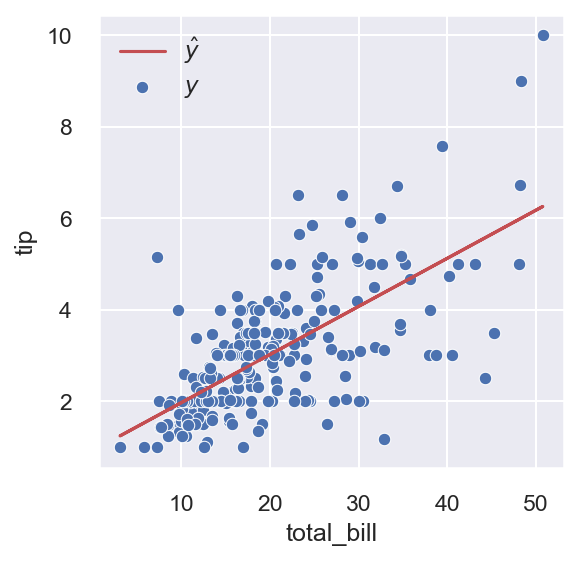

In [82]:
sns.scatterplot(tips["total_bill"], tips["tip"])
x = tips["total_bill"]
y_hat = model.intercept_ + model.coef_ * tips["total_bill"]
plt.plot(x, y_hat, 'r')
plt.legend(['$\hat{y}$', '$y$']);
#plt.savefig("tip_vs_total_bill_linear_regression.png", dpi=300)